Importando librerías

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import re
from scipy.signal import spectrogram

Lectura de datos en los archivos .txt (https://github.com/angiet04/Intro_se-ales06/tree/main/ISB/Laboratorios/Laboratorio6_filtros/data/EEG)

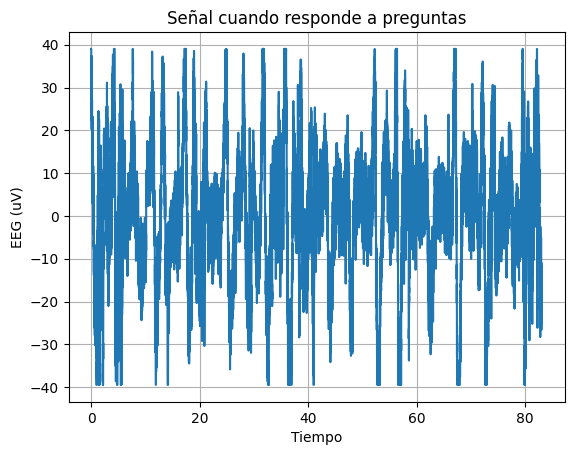

In [66]:
# Nombre del archivo de texto
#archivo = "/content/CesarBase.txt"
#archivo = "/content/cesar_pesta.txt"
archivo = "/content/cesar_preguntas.txt"

# Leer los datos del archivo y omitir las primeras 7 líneas
datos = np.loadtxt(archivo, skiprows=7)

# Extraer la columna de interés (columna 6)
senal = datos[:, 5]

num_muestra = np.arange(len(senal))
# Ganancia = 41782
senalV = (((senal/1024)-1/2)*3.3)/41782
senaluV = senalV*1000000
Fs = 1000 #frecuencia de muestreo
t = num_muestra/Fs
# Trazar la señal
plt.plot(t, senaluV)
plt.xlabel('Tiempo')
plt.ylabel('EEG (uV)')
#plt.title('Señal basal') #título
#plt.title('Señal cuando pestañea') #título
plt.title('Señal cuando responde a preguntas') #título

plt.grid(True)
plt.show()
y=senaluV


Espectro de frecuencias de la señal

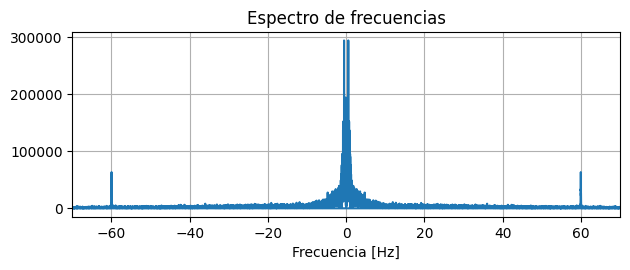

In [63]:
# Calcular la DFT
X = np.fft.fft(y)

# Calcular las frecuencias correspondientes
frequencies = np.fft.fftfreq(len(y), 1/Fs)

plt.subplot(2, 1, 2)
plt.plot(frequencies, np.abs(X))
plt.title('Espectro de frecuencias')
plt.xlabel('Frecuencia [Hz]')
plt.grid()

# Establecer límites en el eje x
plt.xlim([-70,70])

plt.tight_layout()
plt.show()

Espectrograma de la señal original

<ipython-input-64-e00843aec06d>:6: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(t, f, 10 * np.log10(Sxx))  # Usamos escala logarítmica para mejor visualización


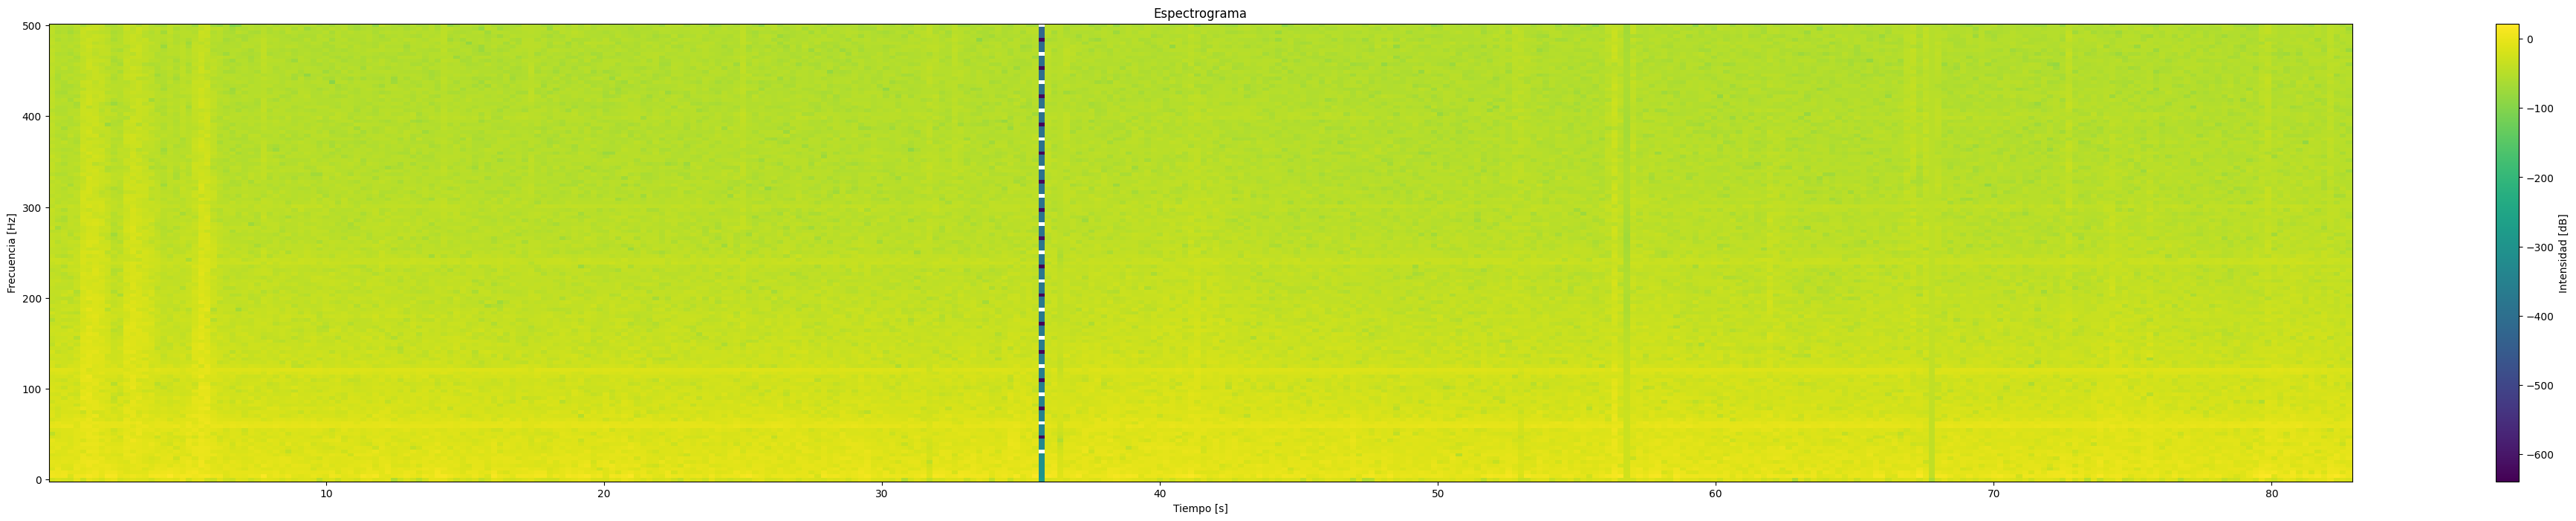

In [64]:
# Calcular la STFT
f, t, Sxx = spectrogram(y, Fs)
plt.figure(figsize=(50, 8))

# Visualizar el espectrograma
plt.pcolormesh(t, f, 10 * np.log10(Sxx))  # Usamos escala logarítmica para mejor visualización
plt.ylabel('Frecuencia [Hz]')
plt.xlabel('Tiempo [s]')
plt.title('Espectrograma')
plt.colorbar(label='Intensidad [dB]')
plt.show()

Se aplica una Wavelet coif3, según lo aplicado en Kathun et.al.

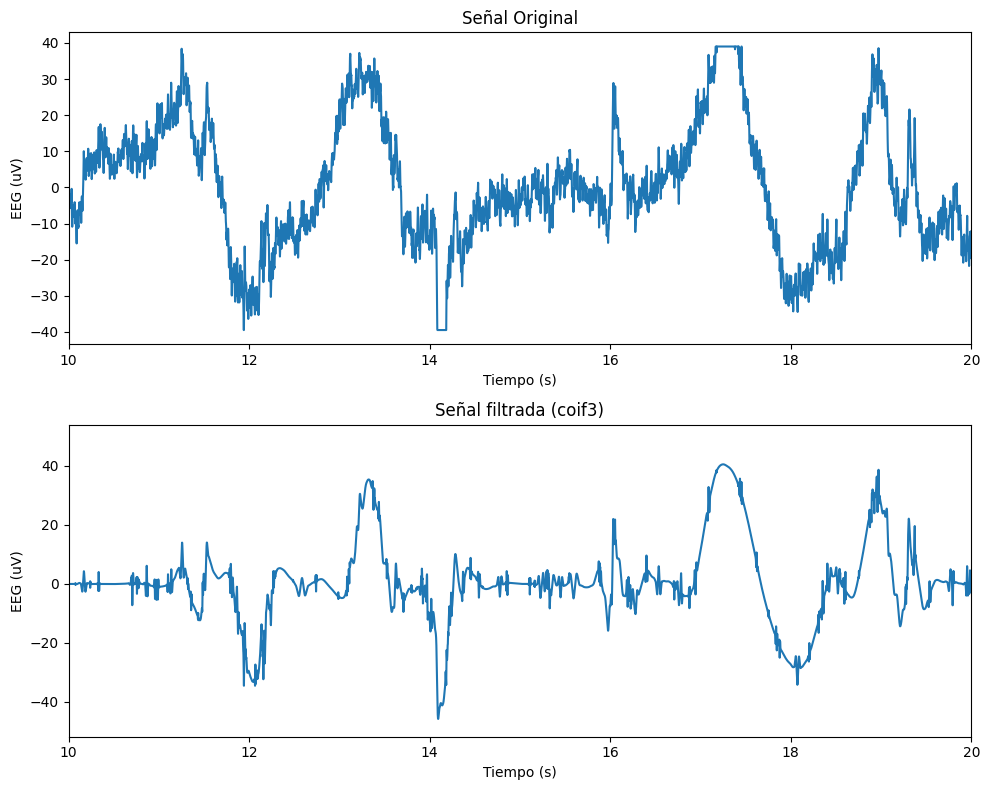

In [67]:
import pywt

# Realizar la descomposición en wavelets
coeffs = pywt.wavedec(y, 'coif3', level=8) #en el paper se usaron hasta 8 niveles

# Calcular la desviación estándar de los coeficientes en cada nivel
std_devs = [np.std(coeff) for coeff in coeffs]

# Calcular los umbrales para cada nivel
umbral = 1.5 * np.array(std_devs) #Según Krishnaveni et al. (aplicado en Kathun et. al.)

# Aplicar el umbral a los coeficientes (hard thresholding)
coeffs_umbral = [pywt.threshold(c, value, mode='hard') for c, value in zip(coeffs, umbral)]

# Reconstruir la señal denoised
senal_denoised = pywt.waverec(coeffs_umbral, 'coif3')

#Visualizar las señales
plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.plot(t, y, label='Señal Original')
plt.xlim(10,20)
plt.title('Señal Original')
plt.xlabel('Tiempo (s)')
plt.ylabel('EEG (uV)')

plt.subplot(2, 1, 2)
plt.plot(t, senal_denoised, label='Señal Denoised')
plt.xlim(10,20)
plt.title('Señal filtrada (coif3)')
plt.xlabel('Tiempo (s)')
plt.ylabel('EEG (uV)')

plt.tight_layout()
plt.show()


Para tener las imágenes por separado:

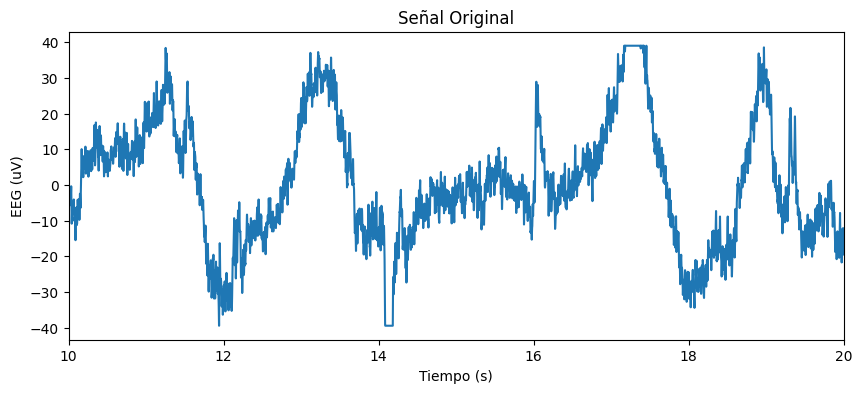

In [68]:
plt.figure(figsize=(10, 4))
plt.plot(t, y, label='Señal Original')
plt.xlim(10,20)
plt.title('Señal Original')
plt.xlabel('Tiempo (s)')
plt.ylabel('EEG (uV)')
plt.show()

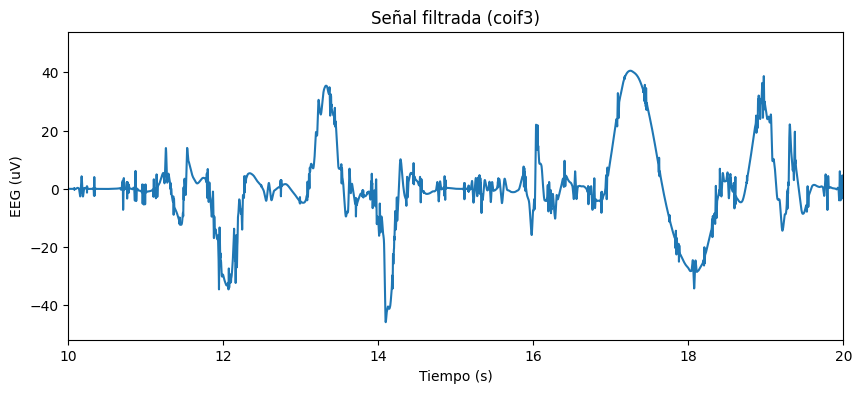

In [69]:
plt.figure(figsize=(10, 4))
plt.plot(t, senal_denoised, label='Señal Denoised')
plt.xlim(10,20)
plt.title('Señal filtrada (coif3)')
plt.xlabel('Tiempo (s)')
plt.ylabel('EEG (uV)')
plt.show()

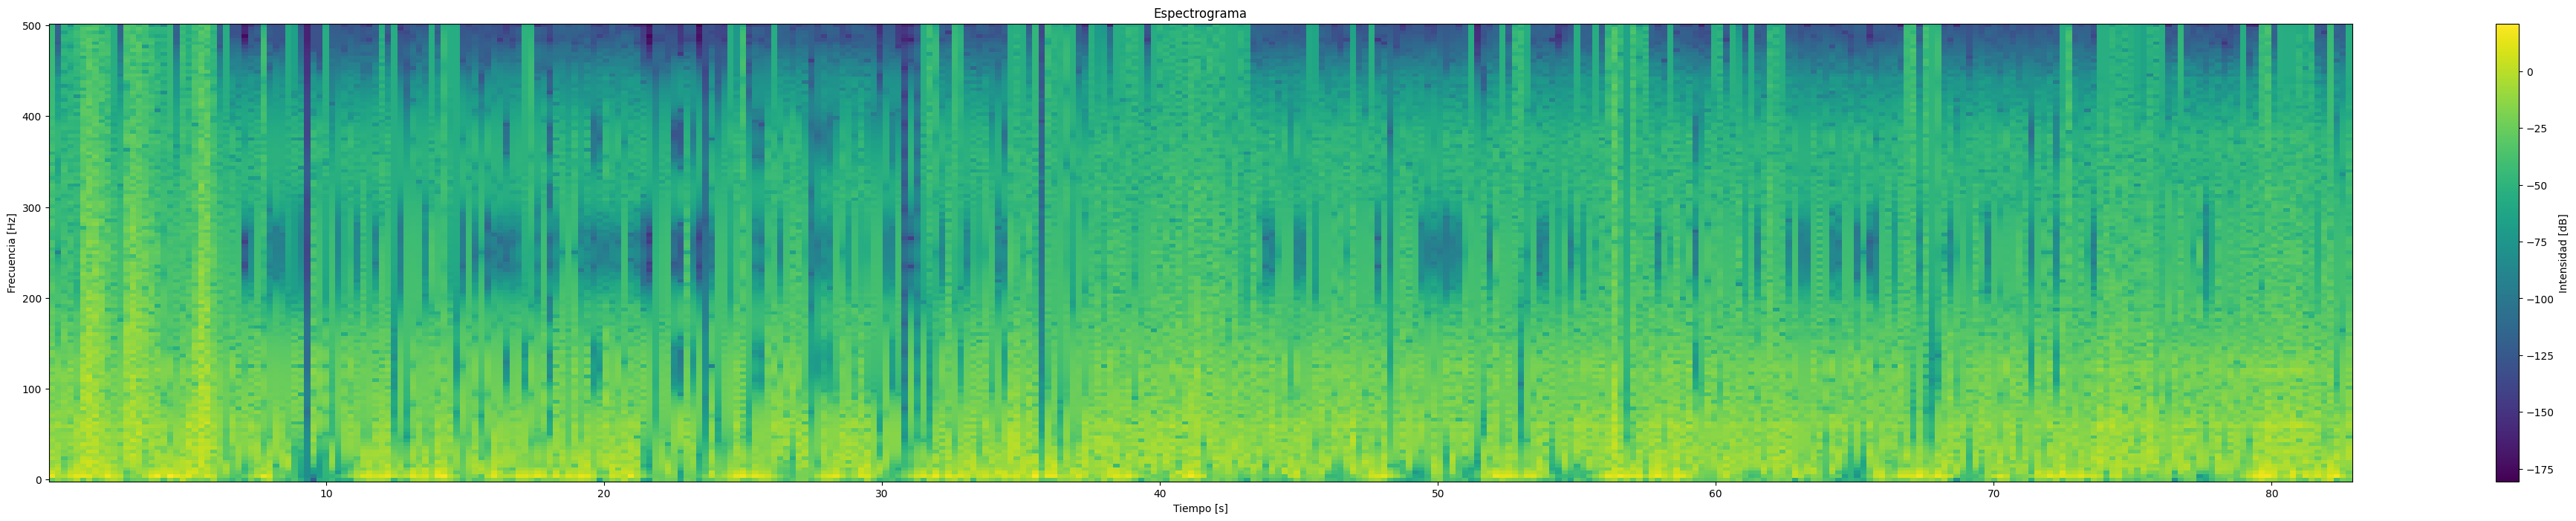

In [28]:
# Calcular la STFT de la señal filtrada
f, t, Sxx = spectrogram(senal_denoised, Fs)
plt.figure(figsize=(50, 8))

# Visualizar el espectrograma
plt.pcolormesh(t, f, 10 * np.log10(Sxx))  # Usamos escala logarítmica para mejor visualización
plt.ylabel('Frecuencia [Hz]')
plt.xlabel('Tiempo [s]')
plt.title('Espectrograma')
plt.colorbar(label='Intensidad [dB]')
plt.show()